In [1]:
import pandas as pd
import numpy as np
import os
cwd = os.getcwd()
cwd

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
SCOPE = 100

import os
cwd = os.getcwd()
cwd

'/work/bde/Git/Informer2020'

In [2]:
test = pd.DataFrame([(0.0, np.nan, -1.0, 1.0),
                   (np.nan, 2.0, np.nan, np.nan),
                   (2.0, 3.0, np.nan, 9.0),
                   (np.nan, 4.0, -4.0, 16.0)],
                  columns=list('abcd'))
test

,a,b,c,d
0,0.0,NaN,-1.0,1.0
1,NaN,2.0,NaN,NaN
2,2.0,3.0,NaN,9.0
3,NaN,4.0,-4.0,16.0


In [3]:
#test.interpolate(method='linear', axis=0)
#df.interpolate(method='linear', limit_direction='forward', axis=0)
#test.interpolate(method='polynomial', order=2)

In [4]:
PATH = '/work/bde'
MOBILITY = 'car'
download = f'{PATH}/Data/4Gdataset/{MOBILITY}/'
df_list = []
file_dir = download

for file in os.listdir(file_dir)[:]:
    print(file)
    df = pd.read_csv(file_dir+file)
    print(df.info())
    
    df = df[['Timestamp', 'Speed', 'CellID', 'RSRP', 'RSRQ', 'SNR', 'CQI', 'RSSI', 'DL_bitrate', 'UL_bitrate', 'NRxRSRP', 'NRxRSRQ']]
    df = df.replace('-', np.nan)
    
    df['date'] = pd.to_datetime(df['Timestamp'], format="%Y.%m.%d_%H.%M.%S")
    df = df.drop(columns=['Timestamp'])

    df['CellID'] = pd.to_numeric(df['CellID'])
    df['RSRP'] = pd.to_numeric(df['RSRP'])
    df['RSRQ'] = pd.to_numeric(df['RSRQ'])
    df['SNR'] = pd.to_numeric(df['SNR'])
    df['CQI'] = pd.to_numeric(df['CQI'])
    df['RSSI'] = pd.to_numeric(df['RSSI'])
    df['DL_bitrate'] = pd.to_numeric(df['DL_bitrate'])
    df['UL_bitrate'] = pd.to_numeric(df['UL_bitrate'])
    df['NRxRSRP'] = pd.to_numeric(df['NRxRSRP'])
    df['NRxRSRQ'] = pd.to_numeric(df['NRxRSRQ'])

    #https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html
    df['second'] = df['date'].dt.second
    df['minute'] = df['date'].dt.minute
    df['hour'] = df['date'].dt.hour
    df['day'] = df['date'].dt.day

    df.interpolate(method='linear', limit_direction='both', axis=0, inplace=True)
    #df.fillna(method='ffill', inplace=True)
    #df.fillna(method='ffill', inplace=True, limit=5)
    df.fillna(0, inplace=True)

    df.drop_duplicates(subset=['date'], inplace=True)
    df.sort_values('date', inplace=True)
    df.info()
    #df.info(show_counts=True)
    #print(df.head())
    #df.plot(subplots=True, layout=(3,3), figsize=(40, 25))
    #df.to_csv('5Gdataset-{}.csv'.format(file), encoding='utf-8', index=False)

    df.to_csv(f'/work/bde/Data/4Gdataset-preprocessed/{file}', encoding='utf-8', index=False)

    df_list.append(df)

A_2017.12.04_15.24.12.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1392 entries, 0 to 1391
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Timestamp             1392 non-null   object 
 1   Longitude             1392 non-null   float64
 2   Latitude              1392 non-null   float64
 3   Speed                 1392 non-null   int64  
 4   Operatorname          1392 non-null   object 
 5   CellID                1392 non-null   int64  
 6   NetworkMode           1392 non-null   object 
 7   RSRP                  1392 non-null   int64  
 8   RSRQ                  1392 non-null   int64  
 9   SNR                   1392 non-null   int64  
 10  CQI                   1392 non-null   int64  
 11  RSSI                  1392 non-null   object 
 12  DL_bitrate            1392 non-null   int64  
 13  UL_bitrate            1392 non-null   int64  
 14  State                 1392 non-null   object 


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
def multi_corr(df, feature):
    fig, ax = plt.subplots(1,3, figsize=(20, 6))

    # when the Pearson and Spearman values are not much different, 
    # our data tends to not have extreme values (outliers)
    corr1 = df.corr('pearson')[[feature]].sort_values(by=feature, ascending=False)
    corr2 = df.corr('spearman')[[feature]].sort_values(by=feature, ascending=False)

    corr3 = df.corr('kendall')[[feature]].sort_values(by=feature, ascending=False)
    #ordinal correlation (Spearman & Kendall Tau)

    sns.heatmap(corr1, ax=ax[0], annot=True)
    sns.heatmap(corr2, ax=ax[1], annot=True)
    sns.heatmap(corr3, ax=ax[2], annot=True)

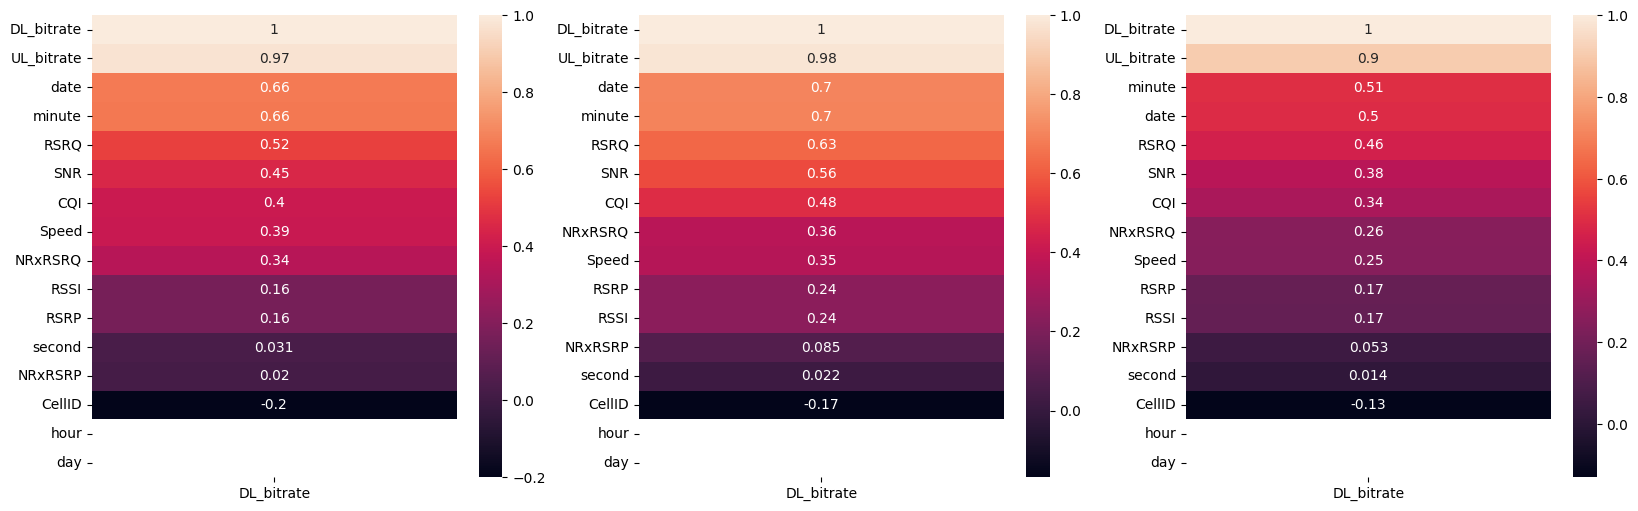

In [7]:
multi_corr(df_list[0], 'DL_bitrate')